##**PART - B**

**Context**

McCurr Healthcare Consultancy is an MNC with thousands of employees spread out across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The head of people operations want to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition.

**Objective**

As a recently hired Data Scientist in the People Operations Department, you have to identify patterns in the characteristics of employyes who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives.

**Data Description**

The data contains information on employyes demographic details, work-related metrics and attrition flag.

**Data Dictionary**

1. **EmployeeNumber** : unique Employee Identifier.
2. **Attrition** : Did the employee attrition hapen or not?
3. **Age** : Age of the employee
4. **BusinessTravel** : Travel commitments for the job
5. **DailyRate** : Data description not available**
6. **Department** : Employee's Department
7. **DistanceFromHome** : Distance from work to home (in km)
8. **Education** : Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
9. **EducationField** : Field of Education
10. **EnvironmentSatisfaction** : 1-Low, 2-Medium, 3-High, 4-Very high
11. **Gender** : Employee's Gender
12. **HourlyRate** : Data Desprition not avaialble**
13. **JobInvolvement** : 1-Low, 2-Medium, 3-High, 4-Very High
14. **JobLevel** : Level of job (1 to 5)
15. **JobRole** : Job Roles
16. **JobSatisfaction** : 1-Low, 2-Medium, 3-High, 4-Very High
17. **MaritalStatus** : Marital Status
18. **MonthlyIncome** : Monthly Salary
19. **MonthlyRate** : Data Description not available**
20. **NumCompaniesWorked** : Number of campany worked at
21. **Over18** : Wheather the employee is over age 18?
22. **OverTime** : Wheather the employee is doing overtime?
23. **PercentSalaryHike** : The percentage increase in the salary last year
24. **PerformanceRating** : 1-Low, 2-Medium, 3-High, 4-Very High
25. **RelationshipSatisfaction** : 1-Low, 2-Medium, 3-High, 4-Very High
26. **StandardHours** : Standard Hours
27. **StockOptionLevel** : Stock Option Level
28. **TotalWorkingYears** : Total years of work
29. **TrainingTimesLastYear** : Number of training attended last year
30. **WorkLifeBalance** : 1-Low, 2-Medium, 3-High, 4-Very High
31. **YearsAtCompany** : Year at company
32. **YearsInCurrentRole** : Years in the current role
33. **YearsSinceLastPromotion** : Years since the last promotion
34. **YearsWithCurrManager** : Years with the current manager

In [83]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
# Loading the Dataset
df = pd.read_excel('/content/drive/MyDrive/Datasets/HR_Employee_Attrition_Dataset.xlsx')
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [57]:
# Basic Exploration
print(df.shape)
print(df.dtypes)

(2940, 34)
EmployeeNumber               int64
Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingT

In [58]:
# Description of the dataset
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,1.102658,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [59]:
# Checking the missing values
df.isnull().sum()

,0
EmployeeNumber,0
Attrition,0
Age,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0


There is no Null Values in the dataset.

In [60]:
# 1. Problem Definition
print("\nProblem Statement:")
print("To predict whether an employee will leave the company based on various features such as job satisfaction, age, salary, etc.")



Problem Statement:
To predict whether an employee will leave the company based on various features such as job satisfaction, age, salary, etc.


In [61]:
print("\nAttrition value counts:")
print(df['Attrition'].value_counts())


Attrition value counts:
Attrition
No     2466
Yes     474
Name: count, dtype: int64


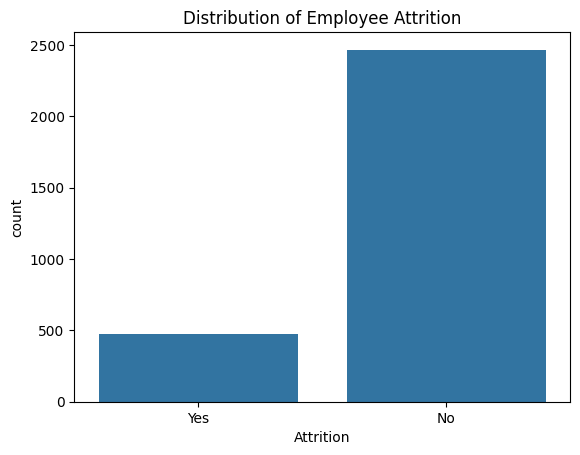

In [62]:
# Plotting the target variable
sns.countplot(data=df, x='Attrition')
plt.title('Distribution of Employee Attrition')
plt.show()

###**Data Preprocessing**

In [78]:
# Drop columns with constant values or identifiers
df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [63]:
# Check for Duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [64]:
# Missing Values
missing = df.isnull().sum()
print("\nMissing Values in each column:")
print(missing[missing > 0])


Missing Values in each column:
Series([], dtype: int64)


In [65]:
# Outlier Detection (IQR Method for select numerical columns)
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers

outliers = detect_outliers('MonthlyIncome')
print(f"\nOutliers in MonthlyIncome: {outliers.shape[0]} rows")


Outliers in MonthlyIncome: 228 rows


**Cap the Outliers (Winsorization)**

In [66]:
# Cap the values at 1st and 99th percentile
lower_cap = df['MonthlyIncome'].quantile(0.01)
upper_cap = df['MonthlyIncome'].quantile(0.99)

df['MonthlyIncome'] = np.where(df['MonthlyIncome'] < lower_cap, lower_cap,
                               np.where(df['MonthlyIncome'] > upper_cap, upper_cap, df['MonthlyIncome']))
print("MonthlyIncome outliers capped using 1st and 99th percentile.")


MonthlyIncome outliers capped using 1st and 99th percentile.


In [67]:
# Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("\nCategorical columns encoded.")


Categorical columns encoded.


###**Exploratory Data Analysis (EDA)**

###**Univariate Analysis**

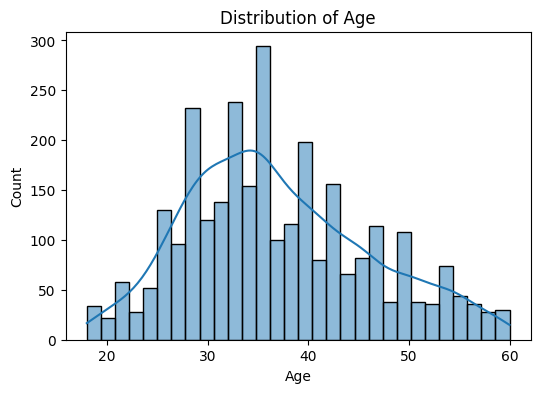

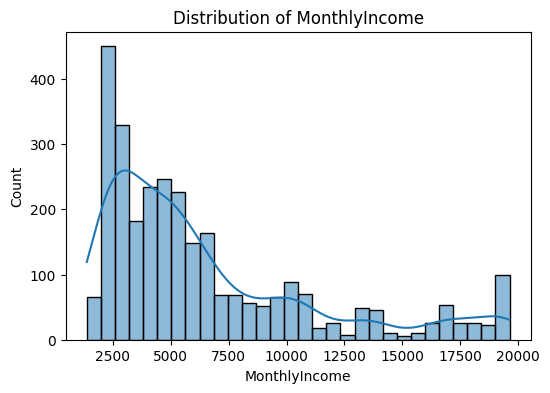

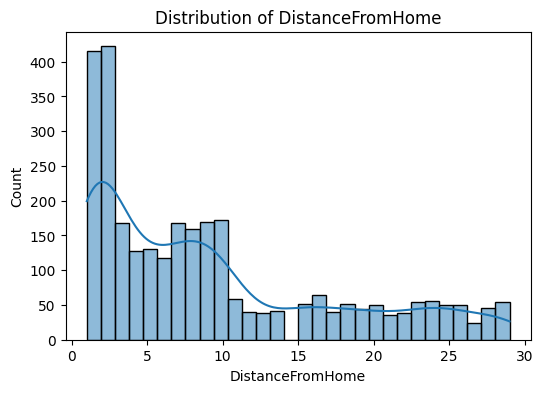

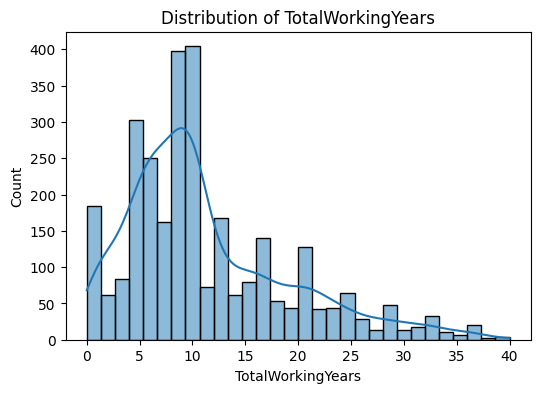

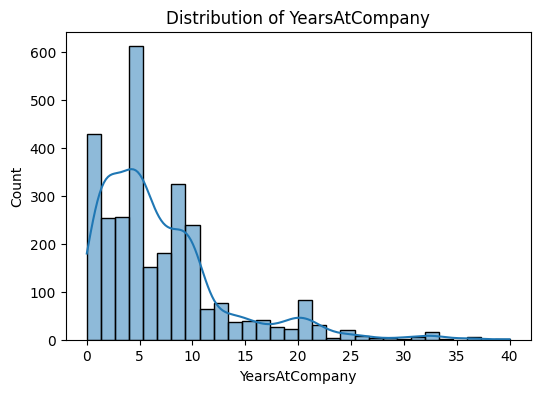

In [68]:
# Visualizing numerical feature distributions
for col in ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

**Insights:**
1. Age is slightly right-skewed; majority of employees are between 30–40.
2. Monthly Income is heavily right-skewed.
3. Most employees live within 0–20 km from work.

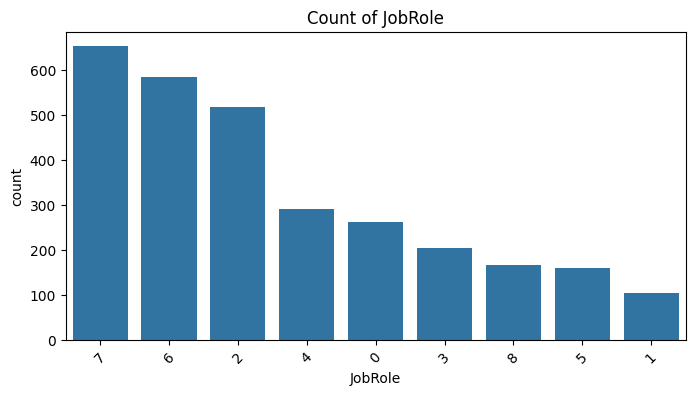

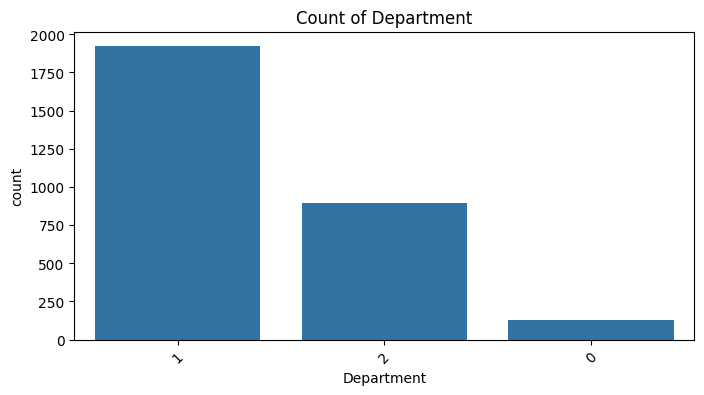

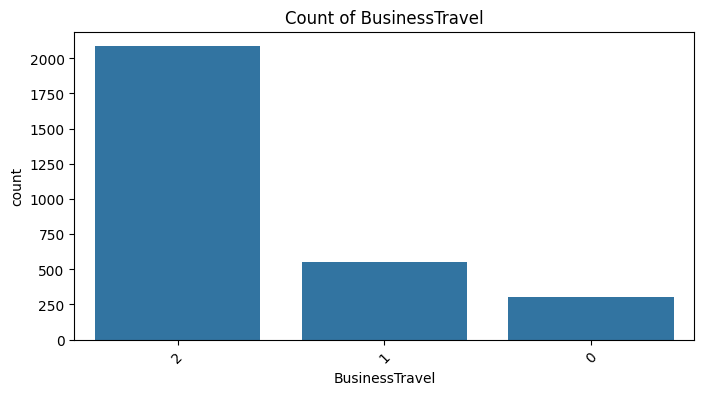

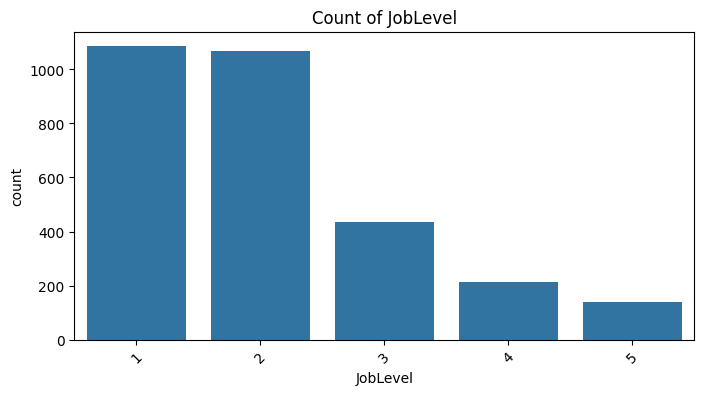

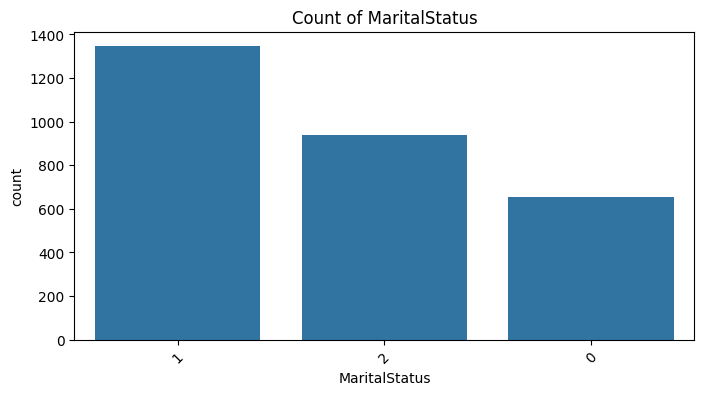

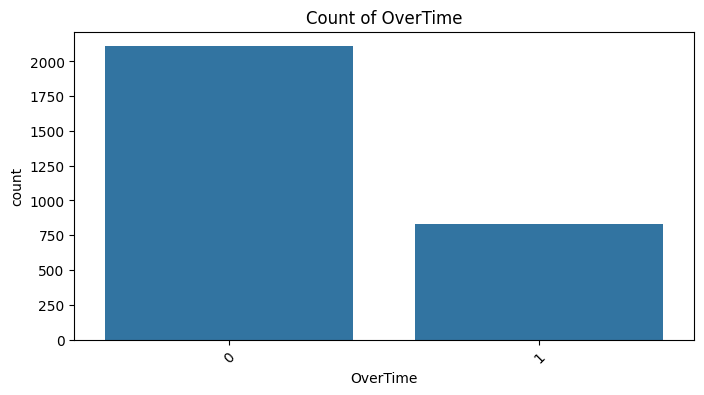

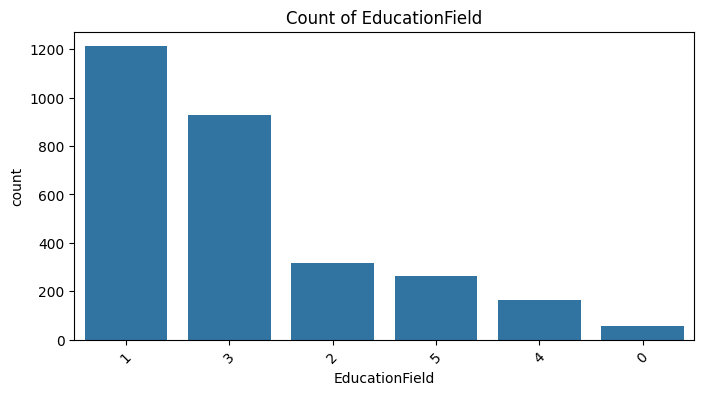

In [69]:
# Visualizing categorical features
categorical_features = ['JobRole', 'Department', 'BusinessTravel', 'JobLevel',
                        'MaritalStatus', 'OverTime', 'EducationField']

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

**Insights:**
1. Most employees work as 'Sales Executive' or 'Research Scientist'.
2. Most do not travel frequently.
3. OverTime feature shows a good mix and may strongly relate to attrition.

###**Bivariate Analysis (Target vs Feature)**

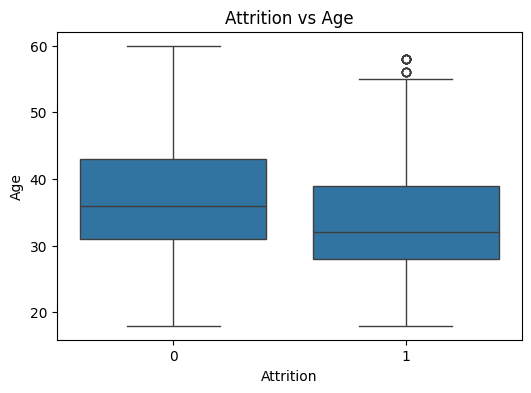

In [70]:
# Attrition vs Age
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Attrition vs Age")
plt.show()

**Insight**: Younger employees are more likely to leave.

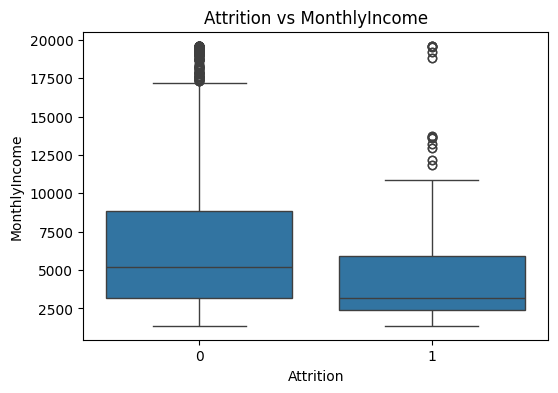

In [71]:
# Attrition vs MonthlyIncome
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs MonthlyIncome")
plt.show()

**Insight**: Lower-paid employees are more likely to leave.

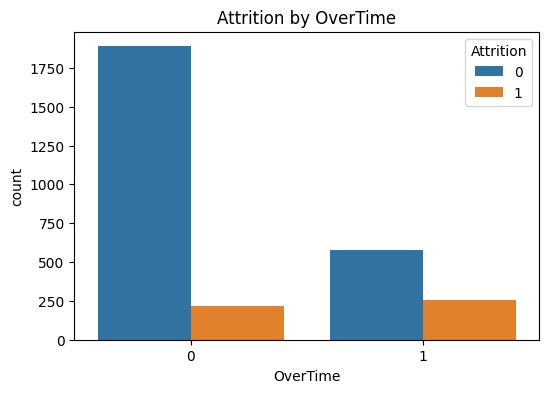

In [72]:
# Attrition vs OverTime
plt.figure(figsize=(6, 4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition by OverTime")
plt.show()

**Insight**: OverTime workers have higher attrition — possible burnout.

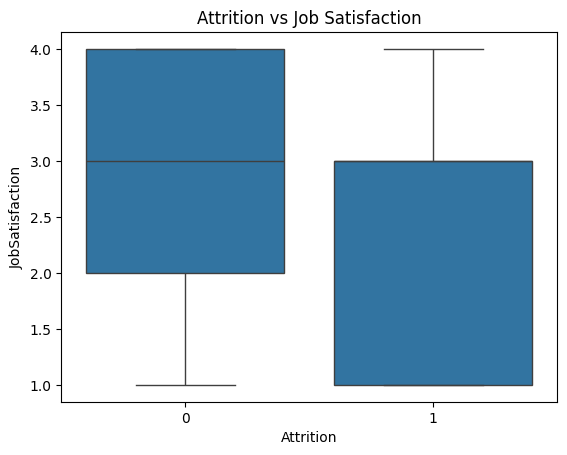

In [73]:
# Attrition vs JobSatisfaction
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title("Attrition vs Job Satisfaction")
plt.show()

**Insight**: Employees with low satisfaction are more prone to leave.

###**Multivariate Analysis**

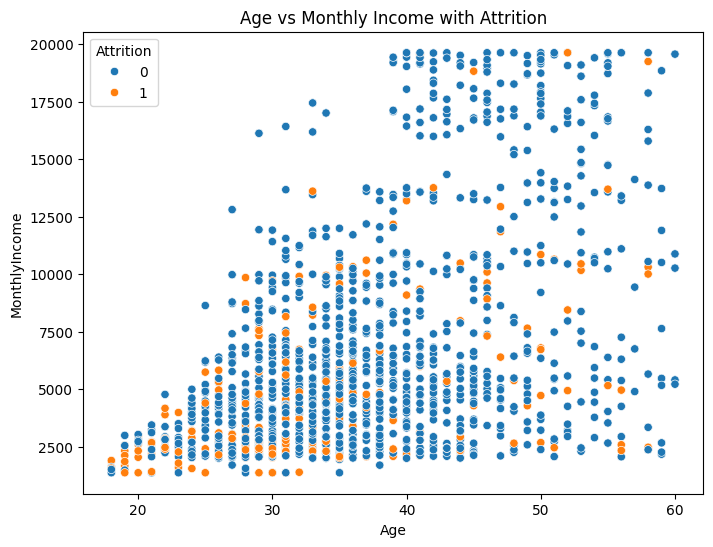

In [74]:
# Age vs Monthly Income colored by Attrition
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', hue='Attrition')
plt.title('Age vs Monthly Income with Attrition')
plt.show()

**Insight**: Younger, lower-paid employees are more likely to leave.

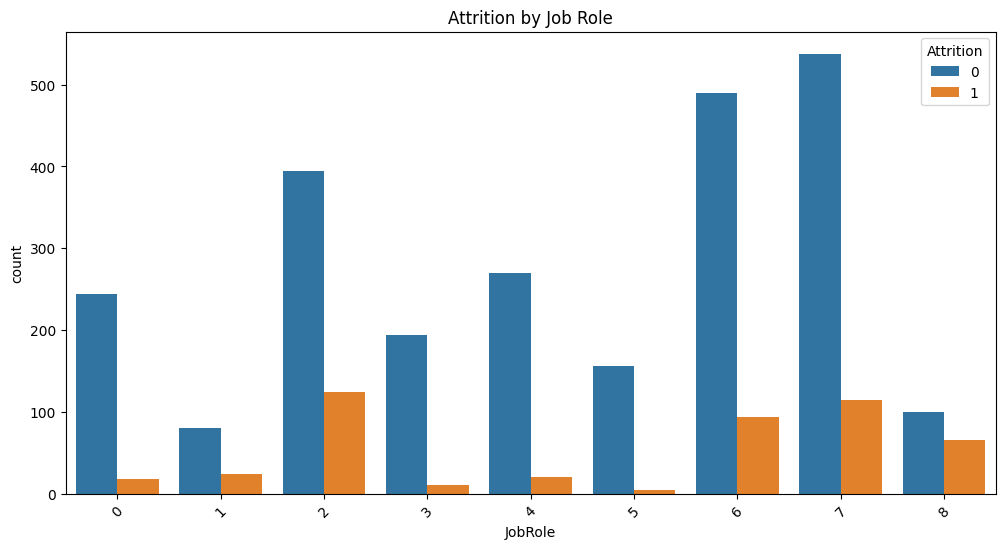

In [75]:
# JobRole and Overtime vs Attrition
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()

<Figure size 800x500 with 0 Axes>

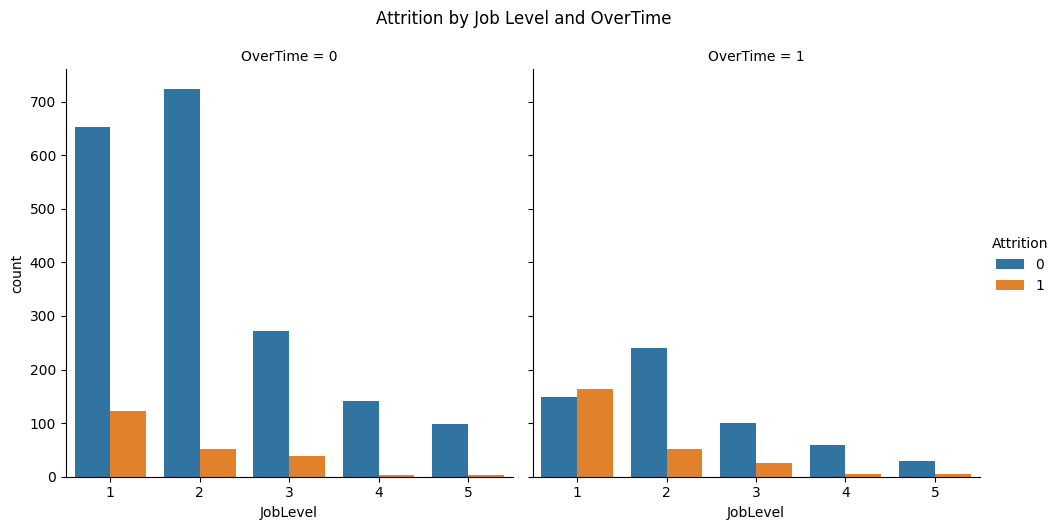

In [76]:
# Combined impact of OverTime and JobLevel on Attrition
plt.figure(figsize=(8, 5))
sns.catplot(data=df, x='JobLevel', hue='Attrition', col='OverTime', kind='count')
plt.suptitle("Attrition by Job Level and OverTime", y=1.05)
plt.show()

**Insight**: Lower-level employees doing OverTime show high attrition — possibly overworked & underpaid.


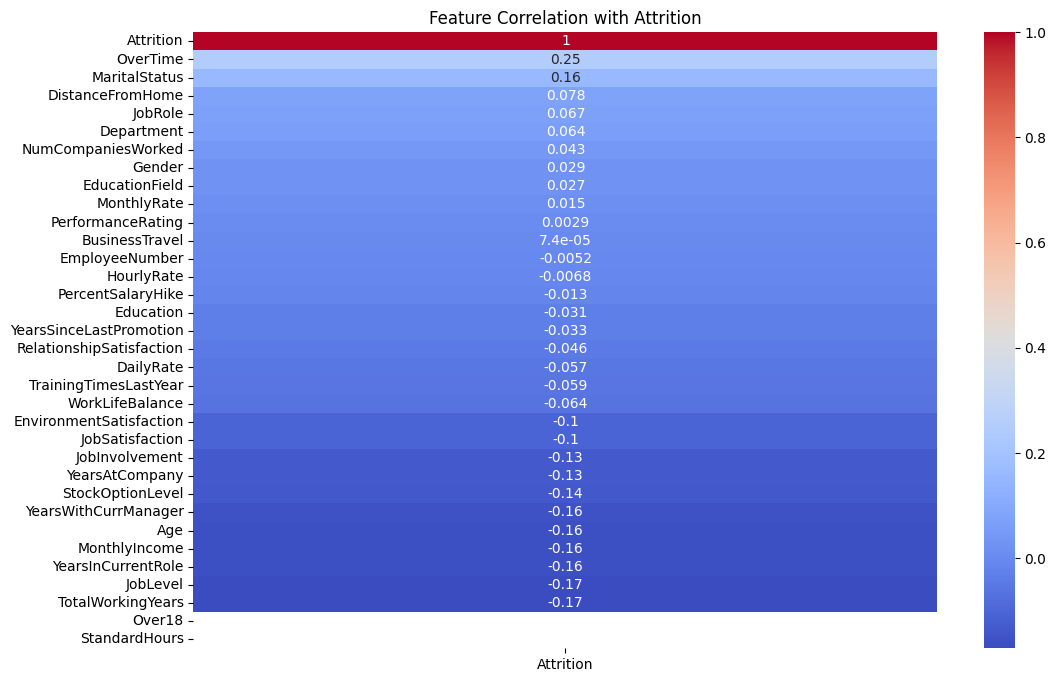

In [77]:
# Heatmap for categorical variable correlation with Attrition
encoded_df = df.copy()
for col in categorical_features:
    encoded_df[col] = le.fit_transform(df[col])

encoded_df['Attrition'] = df['Attrition']  # Keep original Attrition label
corr_matrix = encoded_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Attrition")
plt.show()

**Insight**: OverTime, Age, MonthlyIncome, and JobLevel are top correlated with attrition.


In [79]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [80]:
# Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [81]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
# Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("\nLogistic Regression Performance:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Feature importance (coefficients)
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop predictors from Logistic Regression:")
print(coeff_df.head(10))


Logistic Regression Performance:
[[481  12]
 [ 60  35]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       493
           1       0.74      0.37      0.49        95

    accuracy                           0.88       588
   macro avg       0.82      0.67      0.71       588
weighted avg       0.87      0.88      0.86       588


Top predictors from Logistic Regression:
                    Feature  Coefficient
18                 OverTime     0.791290
26           YearsAtCompany     0.609552
27       YearsInCurrentRole    -0.564989
28  YearsSinceLastPromotion     0.495235
29     YearsWithCurrManager    -0.476946
17       NumCompaniesWorked     0.472057
23        TotalWorkingYears    -0.400701
10           JobInvolvement    -0.392790
13          JobSatisfaction    -0.385485
7   EnvironmentSatisfaction    -0.380200


In [84]:
# K-Nearest Neighbors (KNN)

# Default KNN (k=5)
knn_default = KNeighborsClassifier()
knn_default.fit(X_train_scaled, y_train)
y_pred_knn_default = knn_default.predict(X_test_scaled)

print("\nKNN (Default k=5) Performance:")
print(confusion_matrix(y_test, y_pred_knn_default))
print(classification_report(y_test, y_pred_knn_default))


KNN (Default k=5) Performance:
[[480  13]
 [ 68  27]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       493
           1       0.68      0.28      0.40        95

    accuracy                           0.86       588
   macro avg       0.78      0.63      0.66       588
weighted avg       0.84      0.86      0.84       588



In [85]:
# Tune KNN with best k from 1 to 20
accuracy_scores = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    accuracy_scores.append(acc)

best_k = k_range[np.argmax(accuracy_scores)]
print(f"\nBest K found: {best_k} with accuracy = {max(accuracy_scores):.4f}")

# Final tuned KNN
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_knn_final = knn_final.predict(X_test_scaled)

print("\nKNN (Tuned) Performance:")
print(confusion_matrix(y_test, y_pred_knn_final))
print(classification_report(y_test, y_pred_knn_final))


Best K found: 1 with accuracy = 0.9558

KNN (Tuned) Performance:
[[481  12]
 [ 14  81]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       493
           1       0.87      0.85      0.86        95

    accuracy                           0.96       588
   macro avg       0.92      0.91      0.92       588
weighted avg       0.96      0.96      0.96       588



###**Business Recommendations (Based on Attrition Prediction Analysis)**

**1. Reduce Employee Overtime**


*   Identify departments or roles with high overtime frequency.
*   Introduce workload balancing mechanisms and automation tools.
*   Encourage work-life balance through flexible hours or time-off policies.
*   Monitor and limit excessive overtime to avoid burnout.

**2. Improve Job and Environment Satisfaction**


*   Conduct regular, anonymous employee satisfaction surveys.
*   Focus on improving work culture, team dynamics, and leadership support.
*   Offer professional development and training programs.
*   Implement employee recognition and appreciation initiatives.

**3. Enhance Compensation Strategy**


*   Regularly benchmark salaries with industry standards.
*   Ensure fair and transparent salary increments and promotion cycles.
*   Address pay disparities within roles or departments.
*   Provide performance-linked bonuses or incentives.

**4. Support Career Development**

*   Clearly define career paths and internal mobility opportunities.
*   Offer mentorship programs and technical upskilling courses.
*   Set individual development goals during performance appraisals.
*   Reward long-term employees with loyalty bonuses or growth roles.

**5. Address Work-Life Balance and Stress Factors**

*   Launch wellness programs (mental health, fitness, counseling).
*   Promote vacation usage and discourage excessive workload.
*   Train managers to identify early signs of burnout or disengagement.
*   Provide remote or hybrid work options, where feasible.

**6. Strengthen Retention for High-Risk Profiles**

*   Use the predictive model to flag employees at high attrition risk.
*   Conduct one-on-one stay interviews with these employees.
*   Provide personalized retention plans (role change, salary adjustment, etc.).
*   Monitor impact of retention initiatives through KPIs and attrition trends.






































